预测接收到为垃圾邮件的可能性

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re


导入数据集

In [2]:
with open('spambase.names') as f:
 text = f.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
spam_data = pd.read_csv('spambase.data', header=None, names=labels
+['spam'])

In [3]:
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
spam_mail_data = spam_data.rename(columns={'spam':'class'})

In [5]:
#检查重复数据
spam_mail_data.duplicated().sum()

391

In [7]:
#删除重复数据
spam_mail=spam_mail_data.drop_duplicates()


In [10]:
#检查是否有缺失值
spam_mail.isna().any().any()

False

In [9]:
#五数概括 分析数据
spam_mail.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


数据集中39%的电子邮件被归类为垃圾邮件

In [38]:
Q1 = spam_mail.quantile(0.25)
Q3 = spam_mail.quantile(0.75)
IQR = Q3 - Q1
((spam_mail < (Q1 - 1.5 * IQR)) | (spam_mail > (Q3 + 1.5 * IQR))).sum()

word_freq_make                 982
word_freq_address              811
word_freq_all                  293
word_freq_3d                    46
word_freq_our                  449
word_freq_over                 933
word_freq_remove               762
word_freq_internet             767
word_freq_order                722
word_freq_mail                 748
word_freq_receive              651
word_freq_will                 250
word_freq_people               806
word_freq_report               336
word_freq_addresses            305
word_freq_free                 830
word_freq_business             906
word_freq_email                972
word_freq_you                   58
word_freq_credit               389
word_freq_your                 193
word_freq_font                 112
word_freq_000                  619
word_freq_money                659
word_freq_hp                  1012
word_freq_hpl                  789
word_freq_george               667
word_freq_650                  452
word_freq_lab       

#探索性数据分析

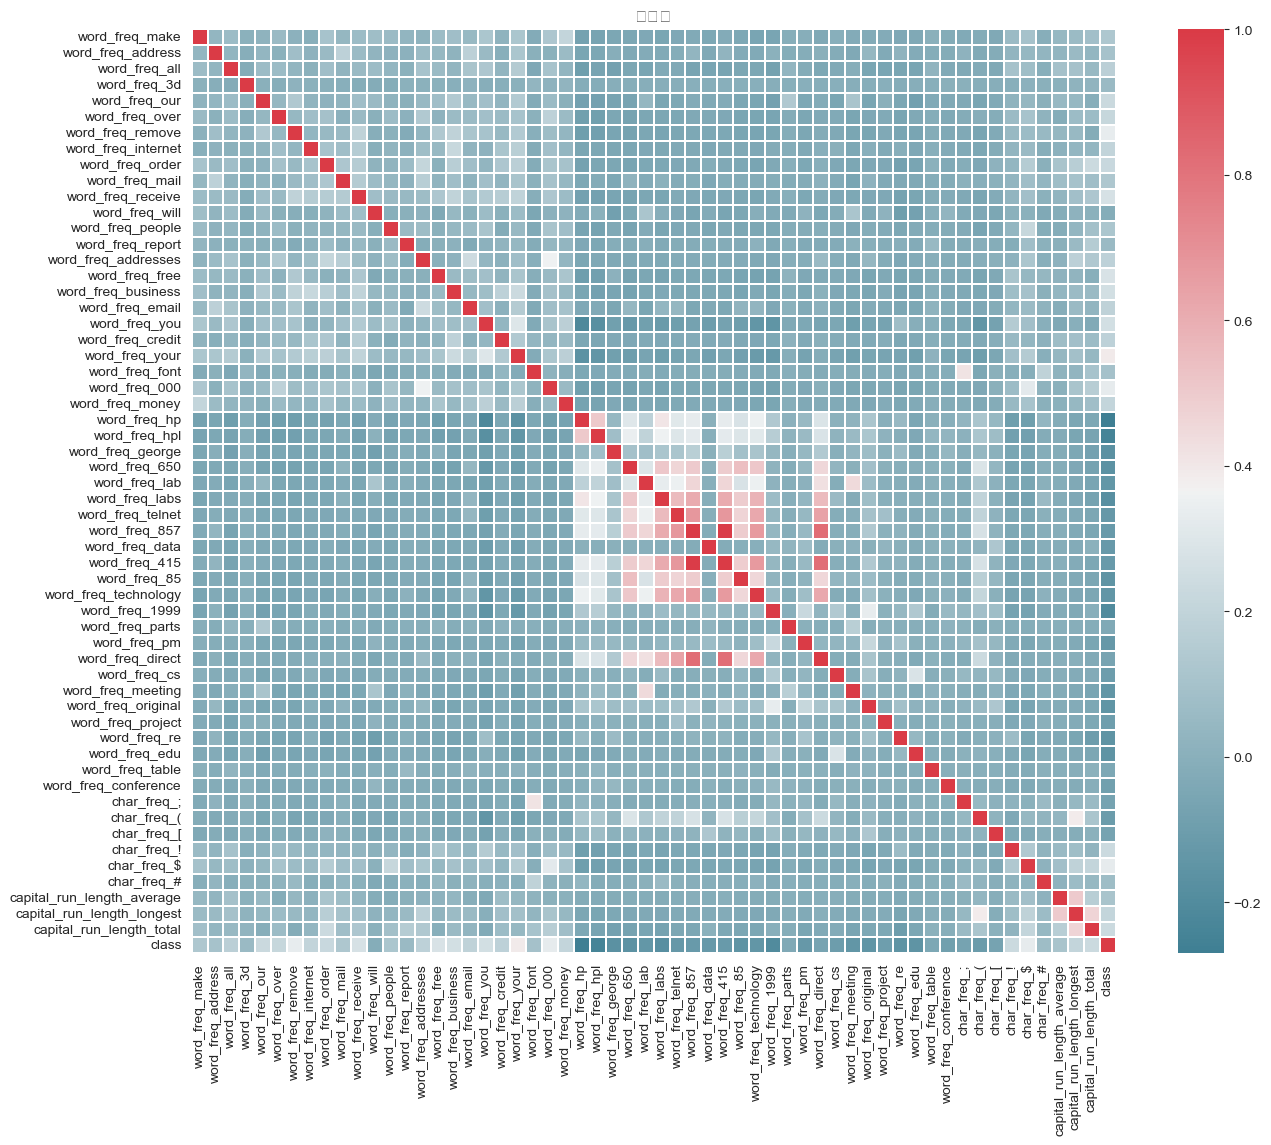

In [39]:
#数据相关性
corr=spam_mail.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
xticklabels=corr.columns,
 yticklabels=corr.columns,
 cmap=sns.diverging_palette(220, 10, as_cmap=True),
 square=True,
 linewidths=.1)
ax.set(title="热力图");

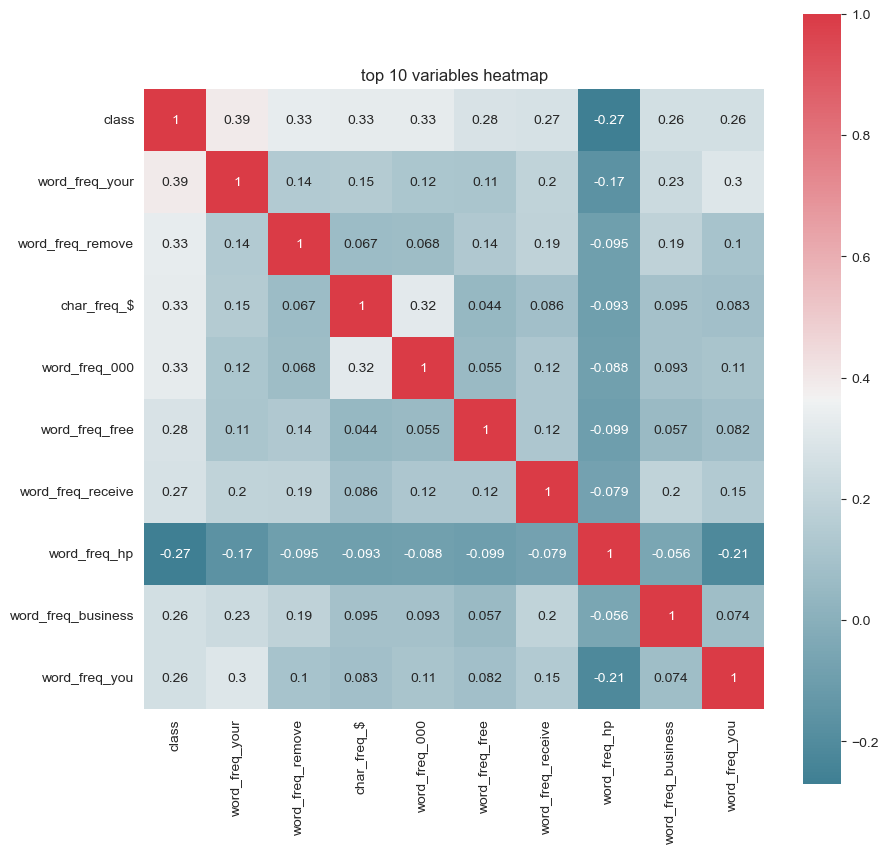

In [40]:
#与正确类别的相关性
k=10
cols=corr.abs().nlargest(k,'class')['class'].index
cm=np.corrcoef(spam_mail[cols].values.T)
plt.figure(figsize=(10, 10))
ax=sns.heatmap(cm,yticklabels=cols.values,
 xticklabels=cols.values,
 cmap=sns.diverging_palette(220, 10, as_cmap=True),
 annot=True,
 square=True)
ax.set(title=f"top {k} variables heatmap");
plt.show()

从图中可以看出，类别和前10名变量之间的相关性很低

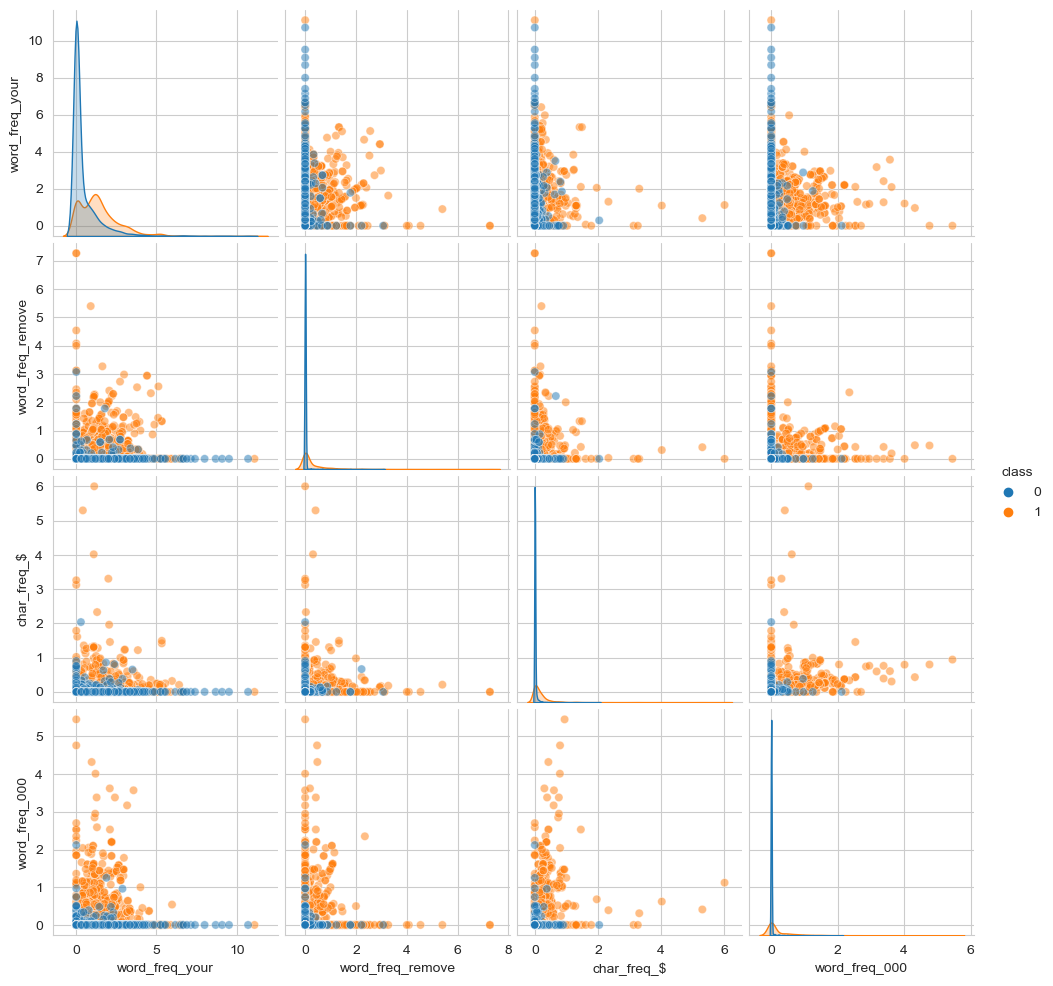

In [14]:
sns.pairplot(data=spam_mail[cols[:5].values],hue="class",plot_kws={'alpha':0.5
});

上图是，垃圾邮件与非垃圾邮件的平均 词的频率



In [15]:
#为freq列创建数据透视表
pivot_class_freq=pd.pivot_table(spam_mail,values=spam_mail.drop(["class","capital_run_length_average","capital_run_length_longest","capital_run_length_total"],axis=1),index='class',aggfunc="mean")
pivot_class_freq

,char_freq_!,char_freq_#,char_freq_$,char_freq_(,char_freq_;,char_freq_[,word_freq_000,word_freq_1999,word_freq_3d,word_freq_415,...,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
class,,,,,,,,,,,,,,,,,,,,,
0,0.120557,0.020835,0.012299,0.167851,0.054208,0.023438,0.007428,0.213177,0.000976,0.074872,...,0.450356,0.015824,0.009265,0.046124,0.008783,0.145117,0.104785,0.575701,1.349265,0.440885
1,0.523199,0.083427,0.172167,0.108167,0.019593,0.008239,0.241108,0.038422,0.156694,0.001918,...,0.123806,0.118285,0.280596,0.083955,0.001269,0.030405,0.001376,0.549381,2.274771,1.366522


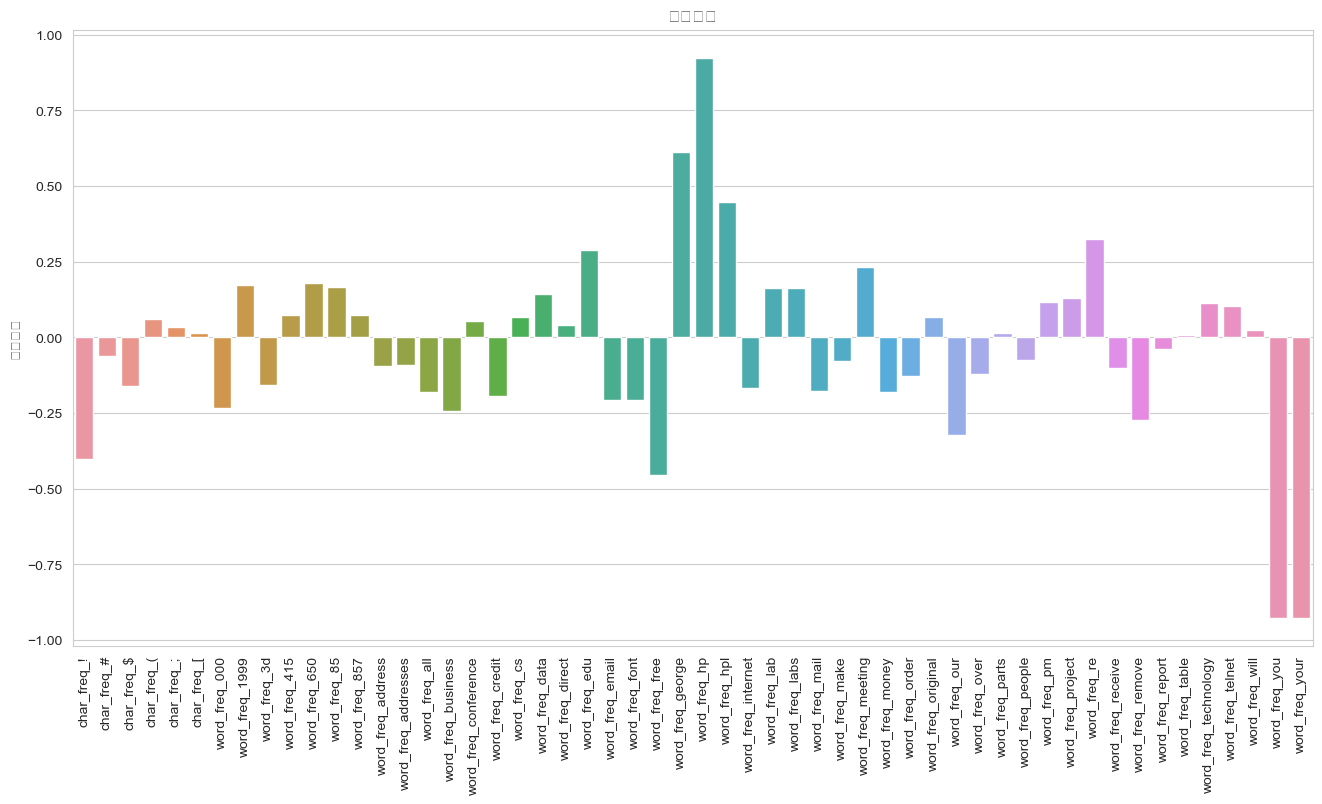

In [41]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x=pivot_class_freq.columns,
 y=pivot_class_freq.iloc[0]-pivot_class_freq.iloc[1]).set(title="平均词频",ylabel="平均词频");


通过词频分析，可以发现“you”和“your”这两个词在垃圾邮件中比在非垃圾邮件中更常见。


In [17]:
#为大写列创建数据透视表

pivot_class_cap=pd.pivot_table(spam_mail,values=spam_mail[["capital_run_length_average","capital_run_length_longest","capital_run_length_total"]],index='class',aggfunc="mean")
pivot_class_cap


,capital_run_length_average,capital_run_length_longest,capital_run_length_total
class,,,
0,2.407102,19.038325,174.461083
1,9.871248,102.038714,467.132222


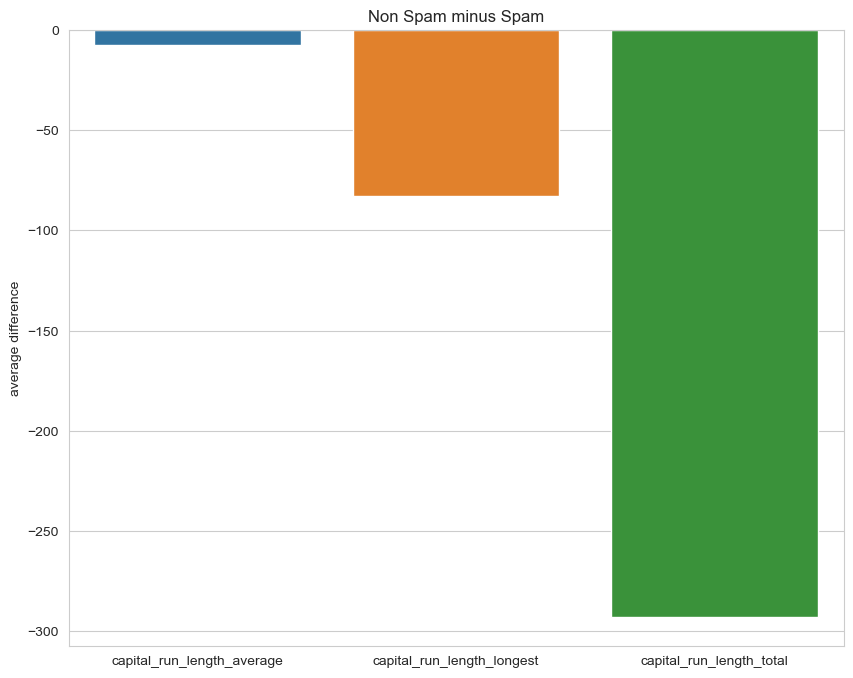

In [18]:
#大写词 数据透视表
plt.figure(figsize=(10,8))
plt.xticks()
sns.barplot(x=pivot_class_cap.columns,
 y=pivot_class_cap.iloc[0]-pivot_class_cap.iloc[1]).set(title="非垃圾邮件减去垃圾邮件",ylabel="平均词频");


上述图说明，与非垃圾邮件相比，垃圾邮件中使用的大写字母要多得多


#预测垃圾邮件数

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [44]:
X = spam_mail.iloc[:, :-1].values
y = spam_mail.iloc[:, 57].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

KNeighborsClassifier

In [22]:
#使用kneighborsClssifier检查平均精度
KNN = KNeighborsClassifier()

scoring = ['accuracy']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)


KNN_accuracy = scores['test_accuracy'].mean()


In [23]:
#模型的准确度分数
print(KNN_accuracy)

0.7894565370526909


###朴素贝叶斯

In [25]:
#使用朴素贝叶斯的GaussianNB 模型的准确性
bayes = GaussianNB()

scoring = ['accuracy']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())

bayes_accuracy = scores['test_accuracy'].mean()



In [26]:
print(bayes_accuracy)

0.8280871372217525


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
bayes = GaussianNB()

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [28]:

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.827790973871734


In [29]:
# 混淆矩阵
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[398 129]
 [ 16 299]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       527
           1       0.70      0.95      0.80       315

    accuracy                           0.83       842
   macro avg       0.83      0.85      0.83       842
weighted avg       0.86      0.83      0.83       842



MULTINOMIALNB CLASSIFIER

In [30]:
#朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [31]:
y_pred = model.predict(X_test)
print(np.mean(predicted == y_test))

0.827790973871734


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[458  69]
 [ 77 238]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       527
           1       0.78      0.76      0.77       315

    accuracy                           0.83       842
   macro avg       0.82      0.81      0.81       842
weighted avg       0.83      0.83      0.83       842



In [33]:
X = spam_mail_data.iloc[:, :-1].values
y = spam_mail_data.iloc[:, 57].values

In [34]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.20)

In [35]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [46]:
yy_pred = model.predict(XX_test)

In [37]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(yy_test, yy_pred))
print(classification_report(yy_test, yy_pred))

[[459  88]
 [ 96 278]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       547
           1       0.76      0.74      0.75       374

    accuracy                           0.80       921
   macro avg       0.79      0.79      0.79       921
weighted avg       0.80      0.80      0.80       921

